In [1]:
from sklearn.model_selection import train_test_split
from dataset_utils import generate_friedman1_dataset, load_ucirepo_dataset
import numpy as np
from utils import plot_objective_histories, run_and_collect_histories, run_c_experiment_logloss, plot_mean_log_loss_vs_C, run_c_experiment_accuracy, plot_mean_accuracy_vs_C

## Log objective history - artificial dataset

Training with method = 'L-BFGS-B'
  Train acc: 1.0000, Test acc: 1.0000
Training with method = 'SLSQP'
  Train acc: 1.0000, Test acc: 1.0000


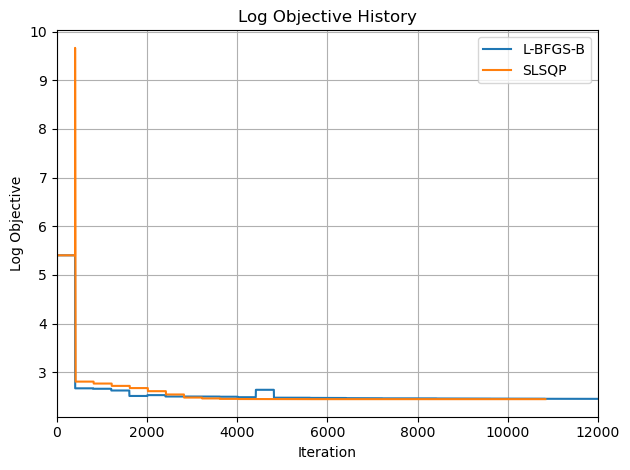

In [3]:
# Generate data
X, y = generate_friedman1_dataset()

# Convert labels to +1/-1
y = np.where(y == 1, 1, -1)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

methods = ["L-BFGS-B", "SLSQP"]

histories = run_and_collect_histories(
        X_train, y_train, X_test, y_test,
        C=2,
        methods=methods
    )

plot_objective_histories(histories, xlim = 12000)

## Log objective history - real dataset

Training with method = 'L-BFGS-B'
  Train acc: 0.9319, Test acc: 0.9211
Training with method = 'Nelder-Mead'
  Train acc: 0.9538, Test acc: 0.9298
Training with method = 'SLSQP'
  Train acc: 0.9319, Test acc: 0.9211
Training with method = 'Powell'
  Train acc: 0.9319, Test acc: 0.9211


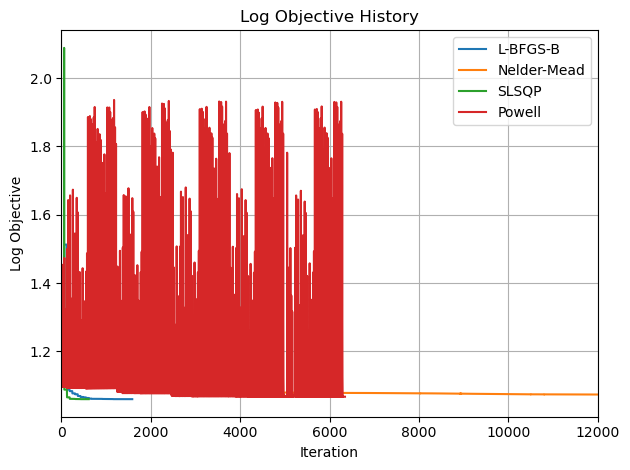

In [5]:
# Generate data
X, y = load_ucirepo_dataset(17)

# Convert labels to +1/-1
y = np.where(y == 1, 1, -1)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

methods = ["L-BFGS-B", "Nelder-Mead", "SLSQP", "Powell"]

histories = run_and_collect_histories(
        X_train, y_train, X_test, y_test,
        C=0.01,
        methods=methods
    )

plot_objective_histories(histories, xlim = 12000)

## C vs loss

C=0.001 → mean log-loss=0.6931 ±0.0000
C=1.054 → mean log-loss=0.0544 ±0.2538
C=2.106 → mean log-loss=0.0464 ±0.2490
C=3.159 → mean log-loss=0.0419 ±0.2358
C=4.211 → mean log-loss=0.0393 ±0.2291
C=5.264 → mean log-loss=0.0374 ±0.2241
C=6.316 → mean log-loss=0.0359 ±0.2189
C=7.369 → mean log-loss=0.0343 ±0.2129
C=8.422 → mean log-loss=0.0328 ±0.2069
C=9.474 → mean log-loss=0.0315 ±0.2016
C=10.53 → mean log-loss=0.0304 ±0.1973
C=11.58 → mean log-loss=0.0294 ±0.1933
C=12.63 → mean log-loss=0.0286 ±0.1901
C=13.68 → mean log-loss=0.0278 ±0.1871
C=14.74 → mean log-loss=0.0271 ±0.1845
C=15.79 → mean log-loss=0.0265 ±0.1820
C=16.84 → mean log-loss=0.0260 ±0.1818
C=17.89 → mean log-loss=0.0259 ±0.1808
C=18.95 → mean log-loss=0.0251 ±0.1783
C=20 → mean log-loss=0.0245 ±0.1747

Best C = 20 with mean log-loss = 0.0245
Optimal C = 20, Mean Log-Loss = 0.0245 ± 0.1747


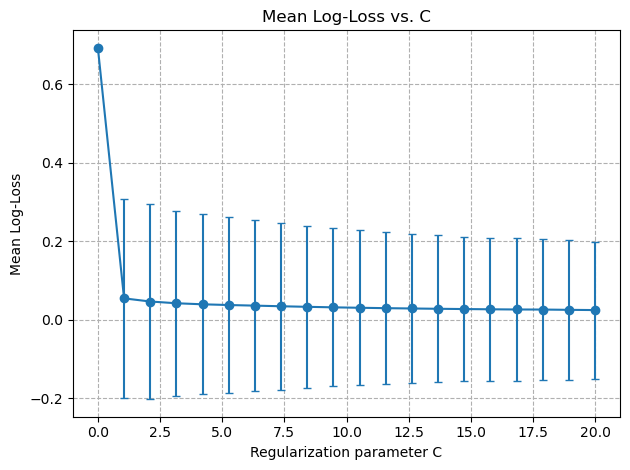

In [4]:
# Define grid of C values
Cs = np.linspace(0.001, 20, 20)

# Run experiment
Cs_arr, mean_losses, std_losses = run_c_experiment_logloss(
    Cs=Cs,
    method='L-BFGS-B',
    n_repeats=10,
    test_size=0.2,
    random_seed=0
)

# Identify best C
best_idx = np.argmin(mean_losses)
print(f"Optimal C = {Cs_arr[best_idx]:.4g}, Mean Log-Loss = {mean_losses[best_idx]:.4f} ± {std_losses[best_idx]:.4f}")

# Plot
plot_mean_log_loss_vs_C(Cs_arr, mean_losses, std_losses)

## C vs accuracy

C=0.001 → mean accuracy=0.3842 ±0.0501
C=1.054 → mean accuracy=0.9728 ±0.0092
C=2.106 → mean accuracy=0.9711 ±0.0096
C=3.159 → mean accuracy=0.9693 ±0.0098
C=4.211 → mean accuracy=0.9702 ±0.0098
C=5.264 → mean accuracy=0.9693 ±0.0106
C=6.316 → mean accuracy=0.9684 ±0.0125
C=7.369 → mean accuracy=0.9684 ±0.0125
C=8.422 → mean accuracy=0.9658 ±0.0133
C=9.474 → mean accuracy=0.9649 ±0.0118
C=10.53 → mean accuracy=0.9632 ±0.0140
C=11.58 → mean accuracy=0.9623 ±0.0147
C=12.63 → mean accuracy=0.9605 ±0.0163
C=13.68 → mean accuracy=0.9605 ±0.0163
C=14.74 → mean accuracy=0.9596 ±0.0167
C=15.79 → mean accuracy=0.9588 ±0.0176
C=16.84 → mean accuracy=0.9570 ±0.0182
C=17.89 → mean accuracy=0.9570 ±0.0182
C=18.95 → mean accuracy=0.9561 ±0.0188
C=20 → mean accuracy=0.9553 ±0.0194

Best C = 1.054 with mean accuracy = 0.9728
Optimal C = 1.054, Mean Accuracy = 0.9728 ± 0.0092


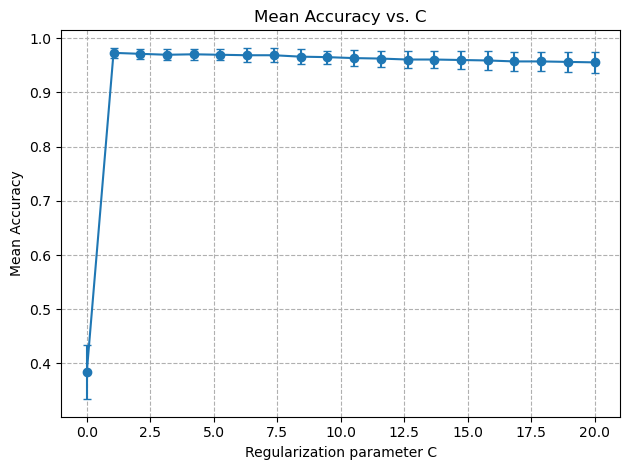

In [5]:
# Define grid of C values
Cs = np.linspace(0.001, 20, 20)

# Run experiment
Cs_arr, mean_acc, std_acc = run_c_experiment_accuracy(
    Cs=Cs,
    method='L-BFGS-B',
    n_repeats=10,
    test_size=0.2,
    random_seed=0
)

# Identify best C
best_idx = np.argmax(mean_acc)
print(f"Optimal C = {Cs_arr[best_idx]:.4g}, Mean Accuracy = {mean_acc[best_idx]:.4f} ± {std_acc[best_idx]:.4f}")

# Plot
plot_mean_accuracy_vs_C(Cs_arr, mean_acc, std_acc)